<a href="https://colab.research.google.com/github/ayanoglu/OrtalamaTahmin/blob/NewData/REDGPAmain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import io

uploaded = files.upload()

Saving Psychology Subject Pool Spring 2021.csv to Psychology Subject Pool Spring 2021.csv


In [2]:
DF = pd.read_csv(io.BytesIO(uploaded['Psychology Subject Pool Spring 2021.csv']), header=None, skip_blank_lines=True)

In [3]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86
0,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1,QID5_1,QID5_2,QID5_3,QID5_4,QID5_5,QID5_6,QID5_7,Q50_1,Q50_2,Q50_3,Q50_4,Q50_5,Q50_6,Q50_7,Q50_8,Q50_9,Q50_10,Q50_11,Q50_12,Q50_13,Q50_14,Q50_15,...,Q3,Q4,Q25,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,q16,Q17,Q18,Q19,Q20,q21,q22,Q23,Q21_1,Q21_2,Q21_3,Q21_4,Q22_1,Q22_2,Q22_3,Q22_4,Q22_5,QID9,Q47,Q44,Q45,Q46,Q46_2_TEXT,QID13,QID14,QID15,id
1,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Information to Consider Before Taking Part in ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Thank you for agreeing to participate in this ...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,Please rate your agreement with each of the fo...,...,Each of the following questions has two option...,I had just bought a new piece of equipment (fo...,I have to talk to someone about something impo...,When I am told that my work has been completel...,If I'm stuck in traffic and miss an important ...,When something really gets me down.,When several things go wrong on the same day,When I have to put all my effort into doing a ...,When I know I must finish something soon.,When I don't have anything in particular to do...,When I am getting ready to tackle a difficult ...,When I have to solve a difficult problem.,When I have a lot of important things to do an...,When I have to take care of something importan...,When I am facing a big project that has to be ...,When I have an obligation to do something that...,When I have learned a new and interesting game.,When one of my friends brings up an interestin...,When I am busy working on an interesting project.,When I read something I find interesting.,When I am trying to learn something new that I...,To what extent do you agree or disagree with e...,To what extent do you agree or disagree with e...,To what extent do you agree or disagree with e...,To what extent do you agree or disagree with e...,How often do you do each of the following? - P...,How often do you do each of the following? - P...,How often do you do each of the following? - P...,How often do you do each of the following? - P...,How often do you do each of the following? - P...,Please indicate the overall satisfaction level...,How many hours a week do you work (paid employ...,What is your cumulative USF GPA?,What year are you?,What is your major? - Selected Choice,"What is your major? - Other, please specify - ...",What is your gender?,What is your age?,What is your ethnicity?,id
2,"{""

In [4]:
DF1 = DF.iloc[3:,18:80]

In [5]:
DF1.head(10)

,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
3,6,5,5,3,5,7,7,7,6,5,2,3,3,1,7,5,5,6,6,5,7,5,7,5,6,7,5,5,1,2,2,2,2,1,1,1,2,2,1,2,2,1,2,1,2,2,1,2,1,2,3,5,5,5,1,1,1,1,1,4,1,4
4,5,6,6,5,6,6,6,5,5,3,2,2,4,6,6,5,4,2,5,5,3,2,2,5,3,5,6,3,2,2,1,1,2,1,2,1,1,1,1,2,2,2,1,1,1,2,1,2,2,1,1,1,4,1,1,1,1,2,1,3,1,3.3
5,6,6,6,6,6,6,6,3,5,3,6,2,3,6,6,6,2,3,5,6,5,2,2,3,5,6,6,2,6,2,1,1,2,1,1,2,2,1,1,2,2,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,3,1,3.3
6,6,6,6,6,6,6,6,6,3,5,5,3,5,2,6,6,6,5,5,6,3,5,2,5,5,6,5,5,2,2,1,2,1,2,2,1,1,2,2,2,1,2,1,2,1,2,1,2,2,1,4,2,1,5,3,1,4,3,1,4,1,3.61
7,6,6,6,6,6,6,6,6,3,5,5,3,6,3,6,6,6,6,5,5,2,5,2,6,6,6,5,5,2,2,1,2,1,2,2,1,1,2,2,2,1,2,1,2,1,2,1,2,2,1,4,2,1,5,3,1,4,3,1,4,1,3.61
8,7,7,5,7,7,6,7,7,1,7,1,7,7,2,7,7,7,1,5,7,7,1,7,7,2,6,6,1,5,1,2,1,2,1,1,1,2,2,2,2,2,2,2,2,1,2,1,2,1,2,1,1,1,4,1,1,1,1,1,4,2,3.61
9,7,6,6,7,7,6,7,7,1,7,1,7,7,2,7,7,7,1,6,7,7,2,7,7,2,7,7,2,5,1,2,1,2,1,1,1,2,2,2,2,2,2,1,2,1,2,1,1,1,2,1,1,1,5,1,1,1,1,1,4,2,3.6
10,5,6,6,6,6,6,6,6,5,4,5,4,4,4,6,5,5,5,5,5,5,5,5,5,5,5,5,3,3,2,2,1,2,1,1,2,2,2,1,2,2,2,1,1,2,1,1,1,1,2,3,3,3,4,3,2,3,3,3,2,3,3.45
11,4,4,4,4,4,4,4,5,3,3,3,3,3,4,5,5,5,5,4,5,4,4,4,3,4,4,5,3,4,2,1,2,2,1,1,1,2,1,1,1,2,2,1,2,2,1,1,2,1,1,1,2,2,2,3,2,3,2,3,3,3,3.4
12,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,3,2,3,2,3,3,4,3,3.4


In [29]:
DF1.to_csv('DF1_PsychologySubjectPoolSpring2021.csv')
from google.colab import files
files.download("DF1_PsychologySubjectPoolSpring2021.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
DF1.isnull().any(axis=1).sum()

81

In [7]:
DF2 = DF1.dropna(axis=0)

In [8]:
DF2.isnull().any(axis=1).sum()

0

In [9]:
DF2.isnull().any(axis=0).sum()

0

In [10]:
DF2.dtypes

18    object
19    object
20    object
21    object
22    object
       ...  
75    object
76    object
77    object
78    object
79    object
Length: 62, dtype: object

In [11]:
DF3 = DF2.apply(pd.to_numeric, errors='coerce')

In [12]:
DF3.isnull().any(axis=1).sum()

10

In [13]:
DF4 = DF3.dropna(axis=0)

In [14]:
DF4.isnull().any(axis=1).sum()

0

In [15]:
DF4.dtypes

18      int64
19      int64
20      int64
21      int64
22      int64
       ...   
75      int64
76      int64
77      int64
78      int64
79    float64
Length: 62, dtype: object

In [64]:
DF4.to_csv('DF4_PsychologySubjectPoolSpring2021.csv')
from google.colab import files
files.download("DF4_PsychologySubjectPoolSpring2021.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
DF4.columns = range(DF4.columns.size)

In [27]:
DF4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,6,5,5,3,5,7,7,7,6,5,2,3,3,1,7,5,5,6,6,5,7,5,7,5,6,7,5,5,1,2,2,2,2,1,1,1,2,2,1,2,2,1,2,1,2,2,1,2,1,2,3,5,5,5,1,1,1,1,1,4,1,4.00
1,5,6,6,5,6,6,6,5,5,3,2,2,4,6,6,5,4,2,5,5,3,2,2,5,3,5,6,3,2,2,1,1,2,1,2,1,1,1,1,2,2,2,1,1,1,2,1,2,2,1,1,1,4,1,1,1,1,2,1,3,1,3.30
2,6,6,6,6,6,6,6,3,5,3,6,2,3,6,6,6,2,3,5,6,5,2,2,3,5,6,6,2,6,2,1,1,2,1,1,2,2,1,1,2,2,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,3,1,3.30
3,6,6,6,6,6,6,6,6,3,5,5,3,5,2,6,6,6,5,5,6,3,5,2,5,5,6,5,5,2,2,1,2,1,2,2,1,1,2,2,2,1,2,1,2,1,2,1,2,2,1,4,2,1,5,3,1,4,3,1,4,1,3.61
4,6,6,6,6,6,6,6,6,3,5,5,3,6,3,6,6,6,6,5,5,2,5,2,6,6,6,5,5,2,2,1,2,1,2,2,1,1,2,2,2,1,2,1,2,1,2,1,2,2,1,4,2,1,5,3,1,4,3,1,4,1,3.61


In [30]:
DF4.reset_index()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,0,6,5,5,3,5,7,7,7,6,5,2,3,3,1,7,5,5,6,6,5,7,5,7,5,6,7,5,5,1,2,2,2,2,1,1,1,2,2,1,2,2,1,2,1,2,2,1,2,1,2,3,5,5,5,1,1,1,1,1,4,1,4.00
1,1,5,6,6,5,6,6,6,5,5,3,2,2,4,6,6,5,4,2,5,5,3,2,2,5,3,5,6,3,2,2,1,1,2,1,2,1,1,1,1,2,2,2,1,1,1,2,1,2,2,1,1,1,4,1,1,1,1,2,1,3,1,3.30
2,2,6,6,6,6,6,6,6,3,5,3,6,2,3,6,6,6,2,3,5,6,5,2,2,3,5,6,6,2,6,2,1,1,2,1,1,2,2,1,1,2,2,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,3,1,3.30
3,3,6,6,6,6,6,6,6,6,3,5,5,3,5,2,6,6,6,5,5,6,3,5,2,5,5,6,5,5,2,2,1,2,1,2,2,1,1,2,2,2,1,2,1,2,1,2,1,2,2,1,4,2,1,5,3,1,4,3,1,4,1,3.61
4,4,6,6,6,6,6,6,6,6,3,5,5,3,6,3,6,6,6,6,5,5,2,5,2,6,6,6,5,5,2,2,1,2,1,2,2,1,1,2,2,2,1,2,1,2,1,2,1,2,2,1,4,2,1,5,3,1,4,3,1,4,1,3.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,750,5,6,6,5,6,6,5,3,5,3,6,2,2,5,5,3,3,5,3,6,5,5,5,2,2,5,3,6,2,2,2,1,2,1,1,1,2,1,2,1,2,1,2,2,2,1,2,1,2,2,5,2,1,3,5,2,4,4,2,4,1,3.68
751,751,7,5,6,7,7,6,6,6,6,6,7,6,6,7,7,7,6,6,6,7,7,6,6,6,7,6,6,7,5,1,2,1,2,1,1,1,2,1,1,1,2,1,2,1,2,1,2,1,1,2,4,5,5,4,4,4,5,4,4,3,5,2.40
752,752,6,6,7,6,6,6,7,7,6,5,6,1,7,7,6,6,6,2,6,6,1,6,6,2,7,7,3,7,6,2,2,1,2,1,2,2,1,1,1,1,2,2,2,1,2,2,1,2,2,1,2,2,1,1,1,2,2,3,1,4,4,3.30
753,753,6,5,7,6,6,6,7,6,2,6,4,6,5,7,5,7,7,2,6,6,6,2,6,6,7,6,7,7,6,2,1,2,1,2,2,2,2,1,1,2,1,1,1,1,1,2,1,2,2,2,4,4,4,4,1,3,4,5,1,5,3,3.92


In [31]:
DF4 = DF4.reset_index()

In [32]:
DF4 = DF4.drop(labels='index', axis=1)

In [ ]:
DF4.to_csv('DF4_PsychologySubjectPoolSpring2021.csv')
from google.colab import files
files.download("DF4_PsychologySubjectPoolSpring2021.csv")

In [34]:
DF4.shape

(755, 62)

In [35]:
DF4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,6,5,5,3,5,7,7,7,6,5,2,3,3,1,7,5,5,6,6,5,7,5,7,5,6,7,5,5,1,2,2,2,2,1,1,1,2,2,1,2,2,1,2,1,2,2,1,2,1,2,3,5,5,5,1,1,1,1,1,4,1,4.00
1,5,6,6,5,6,6,6,5,5,3,2,2,4,6,6,5,4,2,5,5,3,2,2,5,3,5,6,3,2,2,1,1,2,1,2,1,1,1,1,2,2,2,1,1,1,2,1,2,2,1,1,1,4,1,1,1,1,2,1,3,1,3.30
2,6,6,6,6,6,6,6,3,5,3,6,2,3,6,6,6,2,3,5,6,5,2,2,3,5,6,6,2,6,2,1,1,2,1,1,2,2,1,1,2,2,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,3,1,3.30
3,6,6,6,6,6,6,6,6,3,5,5,3,5,2,6,6,6,5,5,6,3,5,2,5,5,6,5,5,2,2,1,2,1,2,2,1,1,2,2,2,1,2,1,2,1,2,1,2,2,1,4,2,1,5,3,1,4,3,1,4,1,3.61
4,6,6,6,6,6,6,6,6,3,5,5,3,6,3,6,6,6,6,5,5,2,5,2,6,6,6,5,5,2,2,1,2,1,2,2,1,1,2,2,2,1,2,1,2,1,2,1,2,2,1,4,2,1,5,3,1,4,3,1,4,1,3.61


In [36]:
XTrain = DF4.iloc[:,:61]
XTrain.shape

(755, 61)

In [105]:
XTrain.iloc[:,50]

0      3
1      1
2      1
3      4
4      4
      ..
750    5
751    4
752    2
753    4
754    1
Name: 50, Length: 755, dtype: int64

do i = 51 to 54;

	if x(i) = 3 then x(i) = 2;
	if x(i) = 7 then x(i) = 3;
end; 


In [37]:
XTrain.iloc[:,50] = np.where(XTrain.iloc[:,50]== 3, 2, XTrain.iloc[:,50])
XTrain.iloc[:,51] = np.where(XTrain.iloc[:,51]== 3, 2, XTrain.iloc[:,51])
XTrain.iloc[:,52] = np.where(XTrain.iloc[:,52]== 3, 2, XTrain.iloc[:,52])
XTrain.iloc[:,53] = np.where(XTrain.iloc[:,53]== 3, 2, XTrain.iloc[:,53])

XTrain.iloc[:,50] = np.where(XTrain.iloc[:,50]== 7, 3, XTrain.iloc[:,50])
XTrain.iloc[:,51] = np.where(XTrain.iloc[:,51]== 7, 3, XTrain.iloc[:,51])
XTrain.iloc[:,52] = np.where(XTrain.iloc[:,52]== 7, 3, XTrain.iloc[:,52])
XTrain.iloc[:,53] = np.where(XTrain.iloc[:,53]== 7, 3, XTrain.iloc[:,53])

In [38]:
XTrain.iloc[:,50]

0      2
1      1
2      1
3      4
4      4
      ..
750    5
751    4
752    2
753    4
754    1
Name: 50, Length: 755, dtype: int64

If gpa > 4 then gpa = .;

In [41]:
DF4.iloc[:,61] = np.where(DF4.iloc[:,61] > 4, 4, DF4.iloc[:,61]) #GPA = DF4.iloc[:,61]
GPA = DF4.iloc[:,61]

*item reversals;

do i = 9, 11, 18, 22, 28, 29;
	x(i) = 8-x(i);


do i = 31, 33, 37, 41, 43, 45, 47, 50; *action-state;
	x(i) = 3 - x(i);

In [42]:
XTrain.iloc[:,8]

0      6
1      5
2      5
3      3
4      3
      ..
750    5
751    6
752    6
753    2
754    5
Name: 8, Length: 755, dtype: int64

In [43]:
XTrain.iloc[:,8] = 8 - XTrain.iloc[:,8]
XTrain.iloc[:,10] = 8 - XTrain.iloc[:,10]
XTrain.iloc[:,17] = 8 - XTrain.iloc[:,17]
XTrain.iloc[:,21] = 8 - XTrain.iloc[:,21]
XTrain.iloc[:,27] = 8 - XTrain.iloc[:,27]
XTrain.iloc[:,28] = 8 - XTrain.iloc[:,28]

XTrain.iloc[:,30] = 3 - XTrain.iloc[:,30]
XTrain.iloc[:,32] = 3 - XTrain.iloc[:,32]
XTrain.iloc[:,36] = 3 - XTrain.iloc[:,36]
XTrain.iloc[:,40] = 3 - XTrain.iloc[:,40]
XTrain.iloc[:,42] = 3 - XTrain.iloc[:,42]
XTrain.iloc[:,44] = 3 - XTrain.iloc[:,44]
XTrain.iloc[:,46] = 3 - XTrain.iloc[:,46]
XTrain.iloc[:,49] = 3 - XTrain.iloc[:,49]

In [44]:
XTrain.iloc[:,8]

0      2
1      3
2      3
3      5
4      5
      ..
750    3
751    2
752    2
753    6
754    3
Name: 8, Length: 755, dtype: int64

In [45]:
XTrain2 = XTrain

efficacy = 0;   *engineering self-efficacy;

do i = 1 to 7;
	efficacy = efficacy + x(i);
end;


In [49]:
XTrain['efficacy']= XTrain.iloc[:, 0:7].sum(axis=1)

In [48]:
XTrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,efficacy
0,6,5,5,3,5,7,7,7,2,5,6,3,3,1,7,5,5,2,6,5,7,3,7,5,6,7,5,3,7,2,1,2,1,1,1,1,1,2,1,2,1,1,1,1,1,2,2,2,1,1,2,5,5,5,1,1,1,1,1,4,1,38
1,5,6,6,5,6,6,6,5,3,3,6,2,4,6,6,5,4,6,5,5,3,6,2,5,3,5,6,5,6,2,2,1,1,1,2,1,2,1,1,2,1,2,2,1,2,2,2,2,2,2,1,1,4,1,1,1,1,2,1,3,1,40
2,6,6,6,6,6,6,6,3,3,3,2,2,3,6,6,6,2,5,5,6,5,6,2,3,5,6,6,6,2,2,2,1,1,1,1,2,1,1,1,2,1,2,2,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,3,1,42
3,6,6,6,6,6,6,6,6,5,5,3,3,5,2,6,6,6,3,5,6,3,3,2,5,5,6,5,3,6,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,1,5,3,1,4,3,1,4,1,42
4,6,6,6,6,6,6,6,6,5,5,3,3,6,3,6,6,6,2,5,5,2,3,2,6,6,6,5,3,6,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,1,5,3,1,4,3,1,4,1,42


habits = 0;     *study habits;

do i = 8 to 29;
	habits = habits + x(i);
end;


In [50]:
XTrain['habbits']= XTrain.iloc[:, 7:29].sum(axis=1)

do i = 30 to 37;
	preocc = preocc + x(i);
end;


In [51]:
XTrain['preocc']= XTrain.iloc[:, 29:37].sum(axis=1)

do i = 38 to 45;
	hesitat = hesitat + x(i);
end;


In [52]:
XTrain['hesitat']= XTrain.iloc[:, 37:45].sum(axis=1)

do i = 46 to 50;
	volatil = volatil + x(i);
end;


In [53]:
XTrain['hesitat']= XTrain.iloc[:, 45:50].sum(axis=1)

engagecurric = 0; *Engagement with school work and curriculum;
do i = 51 to 54;
	engagecurric = engagecurric + x(i);
end;


In [54]:
XTrain['engagecurric']= XTrain.iloc[:, 50:54].sum(axis=1)

do i = 55 to 59;
	engageextra = engageextra+x(i);
end;


In [55]:
XTrain['engageextra']= XTrain.iloc[:, 54:59].sum(axis=1)

In [58]:
XTrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,efficacy,habbits,preocc,hesitat,engagecurric,engageextra
0,6,5,5,3,5,7,7,7,2,5,6,3,3,1,7,5,5,2,6,5,7,3,7,5,6,7,5,3,7,2,1,2,1,1,1,1,1,2,1,2,1,1,1,1,1,2,2,2,1,1,2,5,5,5,1,1,1,1,1,4,1,38,107,10,8,17,5
1,5,6,6,5,6,6,6,5,3,3,6,2,4,6,6,5,4,6,5,5,3,6,2,5,3,5,6,5,6,2,2,1,1,1,2,1,2,1,1,2,1,2,2,1,2,2,2,2,2,2,1,1,4,1,1,1,1,2,1,3,1,40,101,12,10,7,6
2,6,6,6,6,6,6,6,3,3,3,2,2,3,6,6,6,2,5,5,6,5,6,2,3,5,6,6,6,2,2,2,1,1,1,1,2,1,1,1,2,1,2,2,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,3,1,42,93,11,10,4,5
3,6,6,6,6,6,6,6,6,5,5,3,3,5,2,6,6,6,3,5,6,3,3,2,5,5,6,5,3,6,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,1,5,3,1,4,3,1,4,1,42,99,15,10,12,12
4,6,6,6,6,6,6,6,6,5,5,3,3,6,3,6,6,6,2,5,5,2,3,2,6,6,6,5,3,6,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,1,5,3,1,4,3,1,4,1,42,100,15,10,12,12


In [57]:
XTrainRaw = XTrain.iloc[:,0:61]

In [61]:
XTrain.iloc[:,60].describe()

count    755.000000
mean       2.380132
std        1.533837
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        6.000000
Name: 60, dtype: float64

TRY DNN MODEL

In [ ]:
# Model configuration
batch_size = 10
no_epochs = 50
verbosity = 0
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index in kfold.split(X):

  # Define the model architecture
  model1 = Sequential()
  model1.add(Dense(42, input_dim=42, kernel_initializer='normal', activation='relu'))
  model1.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  model1.compile(loss='mean_squared_error', optimizer='adam')

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model1.fit(X.iloc[train_index], y.iloc[train_index],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model1.evaluate(X.iloc[test_index], y.iloc[test_index], verbose=0)
  #print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
  
  print(f'Score for fold {fold_no}: {model1.metrics_names[0]} is {scores}')

  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss is 0.3206396698951721
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss is 0.21313920617103577
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss is 0.2547804117202759
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss is 0.1300947517156601
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss is 0.1825939267873764
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss is 0.2940904200077057
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: loss is 0.21789109706878662
----

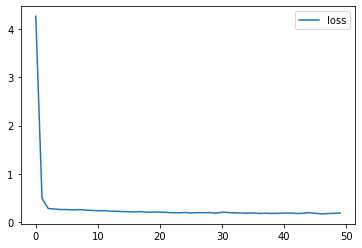

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
# plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [ ]:
model1.evaluate(X.iloc[test_index], y.iloc[test_index], batch_size=10)

2/2 [==============================] - 0s 4ms/step - loss: 0.2314


0.23135071992874146

In [ ]:
y_predict_dnn = model1.predict(X.iloc[test_index])
y_test = y.iloc[test_index]

In [ ]:
mean_squared_error(y_test, y_predict_dnn)

0.23135067887312896

In [ ]:
idx   = np.argsort(y_test)
y_predict_dnn = y_predict_dnn.reshape(y_predict_dnn.shape[0],)
list1 = np.array(y_test)[idx]
list2 = np.array(y_predict_dnn)[idx]
fig = go.Figure()
fig.add_trace(go.Scatter(y=list1, name="y_test", line_shape='linear'))
fig.add_trace(go.Scatter(y=list2, name="y_predict_dnn", line_shape='linear'))
fig.update_layout(title_text='DNN MODEL RESULTS SORTED', title_x=0.5)
fig.show()

In [ ]:
# #train_Input, val_Input, test_input = np.split(DF2, [int(.6 * len(DF2)), int(.8 * len(DF2))])
# DF2shuffled = shuffle(DF2)
# train_Input, test_input = np.split(DF2shuffled, [int(.8 * len(DF2))])

# X_train = train_Input.iloc[:,:-1]
# y_train = train_Input.iloc[:,-1]
# # X_val_Input = val_Input.iloc[:,:-1]
# # y_val= val_Input.iloc[:,-1]
# X_test = test_input.iloc[:,:-1]
# y_test = test_input.iloc[:,-1]

THE GAUSSIAN PROCESS REGRESSOR MODEL

In [ ]:
#train_Input, val_Input, test_input = np.split(DF2, [int(.6 * len(DF2)), int(.8 * len(DF2))])
train_Input, test_input = np.split(DF2, [int(.8 * len(DF2))])

X_train_Input = train_Input.iloc[:,:-1]
y_train= train_Input.iloc[:,-1]
# X_val_Input = val_Input.iloc[:,:-1]
# y_val= val_Input.iloc[:,-1]
X_test_Input = test_input.iloc[:,:-1]
y_test= test_input.iloc[:,-1]

In [ ]:
print(f'Length of training set is', len(X_train_Input))
#print(f'Length of validation set is', len(X_val_Input))
print(f'Length of test set is', len(X_test_Input))

Length of training set is 149
Length of test set is 38


In [ ]:
X_train_Input.shape

(149, 42)

In [ ]:
X_train_Input.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,2.4,2.4,2.4,2.4,2.4,2.4,2.8,2.0,1.2,1.2,2.0,2.0,2.4,1.6,1.6,2.4,2.0,2.8,2.4,2.4,2.4,1.2,2.0,2.0,1.6,2.0,2.0,2.0,2.4,2.0,2.0,0.4,0.4,0.4,0.4,0.4,1.2,1.2,1.6,0.4,2.0,2.0,NaN
1,2.8,2.8,2.4,2.4,2.4,2.8,2.8,2.8,2.0,2.4,2.4,0.8,0.8,1.6,2.8,2.4,2.8,2.8,1.6,2.4,2.0,2.4,0.8,0.8,2.4,2.4,2.4,0.8,2.4,1.6,1.6,1.6,2.8,1.2,0.4,1.6,0.4,0.4,1.6,1.6,2.0,0.8,NaN
2,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.8,2.4,2.4,2.4,0.4,1.6,1.2,2.0,2.0,0.4,0.4,0.4,0.4,1.6,1.6,1.6,0.8,NaN
3,2.4,2.4,2.4,2.0,2.4,2.4,2.0,2.8,1.2,2.8,1.6,1.6,1.6,1.2,1.2,1.2,2.8,2.0,2.0,2.0,1.6,2.0,1.6,2.0,2.0,2.0,2.0,1.6,1.6,0.4,0.4,0.4,2.8,0.4,0.4,0.8,0.8,0.8,0.8,0.4,1.6,2.0,NaN
4,2.4,2.8,2.4,2.4,2.4,2.4,2.8,2.0,1.6,1.2,2.0,0.4,0.4,2.0,2.8,2.8,2.4,0.8,0.8,2.8,2.0,1.6,0.4,0.4,2.4,2.8,1.6,2.0,0.4,1.6,1.6,1.6,2.8,0.4,0.4,0.4,0.4,0.4,2.0,1.6,1.6,0.8,NaN


In [ ]:
# RBF: Radial-basis function kernel (aka squared-exponential kernel)
#      Length Scale ; A vector with the same number of dimensions as the inputs X (anisotropic variant of the kernel) 
# WhiteKernel: Adds noise to the Kernel
# ConstantKernel: Adding a constant kernel is equivalent to adding a constant.

kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(length_scale = 41)  + WhiteKernel(5)

# kernel2 = ConstantKernel(1.0) + ConstantKernel(1.0) * 1.0 * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(5)
 # The parameter nu controlling the smoothness of the learned function. 
 # The smaller nu, the less smooth the approximated function is.For nu=inf, the kernel becomes equivalent to the RBF kernel 
 # and for nu=0.5 to the absolute exponential kernel. Important intermediate values are nu=1.5 (once differentiable functions) 
 # and nu=2.5 (twice differentiable functions). Note that values of nu not in [0.5, 1.5, 2.5, inf] incur a considerably higher computational cost 
 # (appr. 10 times higher) since they require to evaluate the modified Bessel function. 
 # Furthermore, in contrast to l, nu is kept fixed to its initial value and not optimized.

#

# n_restarts_optimizer: The number of restarts of the optimizer for finding the kernel's parameters which maximize the log-marginal likelihood.
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)
model.fit(X_train_Input, y_train)
y_pred_tr, y_pred_tr_std = model.predict(X_train_Input, return_std=True)
y_pred_te, y_pred_te_std = model.predict(X_test_Input, return_std=True)

In [ ]:
r2_score(y_test, y_pred_te)
# r2_score: R^2 (coefficient of determination) regression score function. 
# An R2 of 0 means your regression is no better than taking the mean value, 
# i.e. you are not using any information from the other variables. 
# A Negative R2 means you are doing worse than the mean value. :))

-0.055085015846887186

In [ ]:
model.score(X_test_Input, y_test)
# = ((y_true - y_pred)** 2).sum()  /  ((y_true - y_true.mean()) ** 2).sum()
# Return the coefficient of determination of the prediction.
# The coefficient of determination  is defined as 
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

-0.055085015846887186

Text(0, 0.5, 'Predicted')

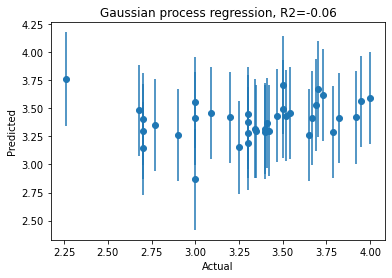

In [ ]:
plt.figure()
plt.errorbar(y_test, y_pred_te, yerr=y_pred_te_std, fmt='o')
# r2_score: R^2 (coefficient of determination) regression score function.
plt.title('Gaussian process regression, R2=%.2f' % r2_score(y_test, y_pred_te))
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
mean_squared_error(y_train, y_pred_tr)

0.1344756624915396

In [ ]:
mean_squared_error(y_test, y_pred_te)

0.1700659679906

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
fig.add_trace(go.Scatter(y=y_pred_te, name="y_pred_te", line_shape='linear'))
fig.show()

In [ ]:
idx   = np.argsort(y_test)
y_pred_te = y_pred_te.reshape(38,)
list1a = np.array(y_test)[idx]
list2a = np.array(y_pred_te)[idx]
fig = go.Figure()
fig.add_trace(go.Scatter(y=list1a, name="y_test", line_shape='linear'))
fig.add_trace(go.Scatter(y=list2a, name="y_pred_te", line_shape='linear'))
fig.update_layout(title_text='GAUSSIAN REGRESSION MODEL RESULTS SORTED', title_x=0.5)
fig.show()

In [ ]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index in kfold.split(X):
  #####
  # RBF: Radial-basis function kernel (aka squared-exponential kernel)
  #      Length Scale ; A vector with the same number of dimensions as the inputs X (anisotropic variant of the kernel) 
  # WhiteKernel: Adds noise to the Kernel
  # ConstantKernel: Adding a constant kernel is equivalent to adding a constant.

  kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(length_scale = 41)  + WhiteKernel(5)

  # kernel2 = ConstantKernel(1.0) + ConstantKernel(1.0) * 1.0 * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(5)
  # The parameter nu controlling the smoothness of the learned function. 
  # The smaller nu, the less smooth the approximated function is.For nu=inf, the kernel becomes equivalent to the RBF kernel 
  # and for nu=0.5 to the absolute exponential kernel. Important intermediate values are nu=1.5 (once differentiable functions) 
  # and nu=2.5 (twice differentiable functions). Note that values of nu not in [0.5, 1.5, 2.5, inf] incur a considerably higher computational cost 
  # (appr. 10 times higher) since they require to evaluate the modified Bessel function. 
  # Furthermore, in contrast to l, nu is kept fixed to its initial value and not optimized.

  #

  # n_restarts_optimizer: The number of restarts of the optimizer for finding the kernel's parameters which maximize the log-marginal likelihood.
  model2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)
  
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
  # Fit data to model
  history2 = model2.fit(X.iloc[train_index], y.iloc[train_index])
  y_pred_tr, y_pred_tr_std = model2.predict(X.iloc[train_index], return_std=True)
  y_pred_te, y_pred_te_std = model2.predict(X.iloc[test_index], return_std=True)

  #####

  # Generate generalization metrics - model.score(X_test_Input, y_test)
  scores1 = model2.score(X.iloc[test_index], y.iloc[test_index])
  #print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
  scores2 = mean_squared_error(y.iloc[test_index], y_pred_te)

  print(f'Score for fold {fold_no}: coefficient of determination of the prediction is {scores1}')
  print(f'Score for fold {fold_no}: MSE is {scores2}')

  #acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores2)

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('MSE per fold')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - MSE: {loss_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> MSE: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: coefficient of determination of the prediction is -0.01391622522239011
Score for fold 1: MSE is 0.10288132104262117
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: coefficient of determination of the prediction is 0.019354405124368035
Score for fold 2: MSE is 0.12434423154835501
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: coefficient of determination of the prediction is 0.042358149805062584
Score for fold 3: MSE is 0.22370778895304486
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: coefficient of determination of the prediction is 0.1214309176908609
Score for fold 4: MSE is 0.12492570911812562
------------------------------------------------------------------------
Train

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


Score for fold 7: coefficient of determination of the prediction is -0.09827287559516273
Score for fold 7: MSE is 0.1563052221164205
------------------------------------------------------------------------
Training for fold 8 ...
Score for fold 8: coefficient of determination of the prediction is -0.08225885102679498
Score for fold 8: MSE is 0.2637411375070766
------------------------------------------------------------------------
Training for fold 9 ...
Score for fold 9: coefficient of determination of the prediction is -0.037579440044370305
Score for fold 9: MSE is 0.20337998107425273
------------------------------------------------------------------------
Training for fold 10 ...
Score for fold 10: coefficient of determination of the prediction is -0.1192450698975771
Score for fold 10: MSE is 0.1110640009807716
------------------------------------------------------------------------
MSE per fold
------------------------------------------------------------------------
> Fold 1 - MSE